In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [2]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0


### Visualize/Explore Data - If You Want, You Do You

## Solutions

In [38]:
math.e

2.718281828459045

In [39]:
df['income'] = (math.e)**(df['log.annual.inc'])
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid,income
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,85000.000385
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,65000.000073
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,31999.999943
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,85000.000385
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0,80799.999636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,1,195000.000479
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,1,68999.999753
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,1,39999.999876
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,1,49999.999779


In [40]:
#question 2,3
dfpaid = df[df['not.fully.paid'] == 0]
dfnotpaid = df[df['not.fully.paid'] == 1]

ficopaid = dfpaid['fico']
ficonotpaid = dfnotpaid['fico']

ficopaidmean = ficopaid.mean()
ficonotpaidmean = ficonotpaid.mean()
ficopaidmean, ficonotpaidmean

stat, pval =ss.ttest_ind(ficopaid, ficonotpaid)
pval

4.227100096647354e-49

In [41]:
#question 4
dfcreditworthy = df[df['credit.policy'] == 1]
dfcreditnotworthy = df[df['credit.policy'] == 0]

ficocreditworthy = dfcreditworthy['fico']
ficocreditnotworthy = dfcreditnotworthy['fico']

stat2, pval2 = ss.ttest_ind(ficocreditworthy,ficocreditnotworthy)
pval2

2.6100416830751396e-271

In [42]:
#question 6,7
incomecreditworthy = dfcreditworthy['income']
incomecreditnotworthy = dfcreditnotworthy['income']
incomecreditworthyCount = incomecreditworthy.count()
incomecreditnotworthyCount = incomecreditnotworthy.count()


stat3, pval3 = ss.ttest_ind(incomecreditworthy,incomecreditnotworthy)
print('pvalue:',pval3)

from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(incomecreditworthy, incomecreditnotworthy)
alpha = .05
nobs = incomecreditworthyCount + incomecreditnotworthyCount

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces

pvalue: 0.3859169935319494


(0.5902673678531373, -0.02236062590223566)

In [43]:
#question 8
n = powerTest.solve_power(ces, power=.8, nobs=None, alpha=alpha)
n

15699.717727757563

In [44]:
#question 9
df['income'].mean()

68402.03071015501

<AxesSubplot:xlabel='fico', ylabel='Count'>

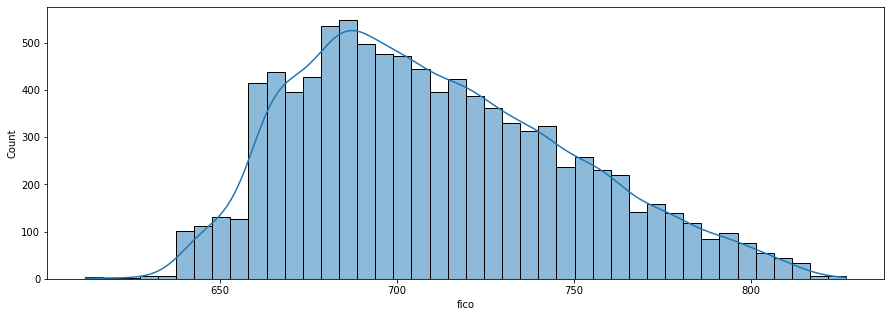

In [48]:
sns.histplot(df['fico'], kde=True)

In [112]:
ficofair

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid,income
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0,80799.999636
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,1,45000.000056
11,1,debt_consolidation,0.1324,253.58,11.835009,9.16,662,4298.000000,5122,18.2,2,0,137999.999429
19,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,591,84.4,3,0,59999.999928
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,99999.999503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9549,0,home_improvement,0.2164,729.70,11.877569,8.63,667,8280.041667,55442,66.9,9,1,144000.000208
9560,0,all_other,0.1867,547.36,11.407565,15.76,667,10050.041670,13255,88.4,7,0,90000.000062
9566,0,all_other,0.2164,551.08,11.002100,24.06,662,1800.000000,16441,49.8,9,1,59999.999928
9568,0,all_other,0.1979,37.06,10.645425,22.17,667,5916.000000,28854,59.8,6,0,42000.000115


In [145]:
#question 12

ficopoor = df[df['fico']<=579]
ficofair = df[df['fico']>=580]
ficofair=ficofair[ficofair['fico']<=669]

ficogood = df[df['fico']>=670]
ficogood=ficogood[ficogood['fico']<=739]

ficoverygood = df[df['fico']>=740]
ficoverygood=ficoverygood[ficoverygood['fico']<=799]

ficoex = df[df['fico']>=800]
ficoex=ficoex[ficoex['fico']<=850]

varStat, varP = ss.levene(
               df['income'][df['fico'].between(580,669)],
               df['income'][df['fico'].between(670,739)],
               df['income'][df['fico'].between(740,799)],
               df['income'][df['fico'].between(800,850)])
varP

7.172631377031566e-07

In [147]:
ss.f_oneway(   
               df['income'][df['fico'].between(580,669)],
               df['income'][df['fico'].between(670,739)],
               df['income'][df['fico'].between(740,799)],
               df['income'][df['fico'].between(800,850)])

F_onewayResult(statistic=24.589840884616397, pvalue=7.630749644284833e-16)

In [93]:
ficoverygood

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid,income
12,1,debt_consolidation,0.0859,316.11,10.933107,15.49,767,6519.958333,6068,16.7,0,0,56000.000016
13,1,small_business,0.0714,92.82,11.512925,6.50,747,4384.000000,3021,4.8,0,0,99999.999503
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,109999.999475
20,1,all_other,0.0800,188.02,11.225243,16.08,772,4888.958333,29797,23.2,1,0,74999.999811
21,1,all_other,0.0863,474.42,10.819778,2.59,797,11951.000000,5656,27.6,0,0,49999.999779
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9461,0,all_other,0.0894,444.81,11.225243,20.18,747,7560.041667,205956,32.4,1,0,74999.999811
9464,0,credit_card,0.1148,659.37,11.769983,17.40,757,8760.000000,230420,33.8,0,0,129312.000274
9491,0,small_business,0.1426,514.59,11.289782,17.86,782,11220.000000,235868,17.5,0,0,79999.999708
9495,0,small_business,0.1531,870.39,11.918391,22.70,762,6960.000000,248480,42.4,0,0,149999.999538


In [107]:
#question 13-14
ficoex.count()


credit.policy        145
purpose              145
int.rate             145
installment          145
log.annual.inc       145
dti                  145
fico                 145
days.with.cr.line    145
revol.bal            145
revol.util           145
inq.last.6mths       145
not.fully.paid       145
income               145
dtype: int64

In [148]:
#q15-16
ss.f_oneway(   
               df['int.rate'][df['fico'].between(580,669)],
               df['int.rate'][df['fico'].between(670,739)],
               df['int.rate'][df['fico'].between(740,799)],
               df['int.rate'][df['fico'].between(800,850)])

varStat2, varP2 = ss.levene(   
               df['int.rate'][df['fico'].between(580,669)],
               df['int.rate'][df['fico'].between(670,739)],
               df['int.rate'][df['fico'].between(740,799)],
               df['int.rate'][df['fico'].between(800,850)])
print(varP2)

7.4323297218187654e-06


In [149]:
ss.f_oneway(   
               df['revol.util'][df['fico'].between(580,669)],
               df['revol.util'][df['fico'].between(670,739)],
               df['revol.util'][df['fico'].between(740,799)],
               df['revol.util'][df['fico'].between(800,850)])

varStat3, varP3 = ss.levene(   
               df['revol.util'][df['fico'].between(580,669)],
               df['revol.util'][df['fico'].between(670,739)],
               df['revol.util'][df['fico'].between(740,799)],
               df['revol.util'][df['fico'].between(800,850)])
varP3

3.1647753720679453e-119